In [34]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../..')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
df_descodificada = pd.read_csv('../../Datos/datos_defunciones/df_descodificada.csv', index_col=0)

In [36]:
df_descodificada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31351 entries, 0 to 31350
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha              31351 non-null  object
 1   region             31351 non-null  object
 2   provincia          31351 non-null  object
 3   dia_semana         31351 non-null  object
 4   mes                31351 non-null  object
 5   anio               31351 non-null  int64 
 6   rango_hora         31351 non-null  object
 7   tipo_via           31351 non-null  object
 8   sexo               31351 non-null  object
 9   grupo_edad         31351 non-null  object
 10  condicion_victima  31351 non-null  object
 11  tipo_accidente     31351 non-null  object
 12  medio_trans        31351 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.3+ MB


In [37]:
df_descodificada['fecha'] = pd.to_datetime(df_descodificada['fecha'])

In [38]:
df_descodificada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31351 entries, 0 to 31350
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              31351 non-null  datetime64[ns]
 1   region             31351 non-null  object        
 2   provincia          31351 non-null  object        
 3   dia_semana         31351 non-null  object        
 4   mes                31351 non-null  object        
 5   anio               31351 non-null  int64         
 6   rango_hora         31351 non-null  object        
 7   tipo_via           31351 non-null  object        
 8   sexo               31351 non-null  object        
 9   grupo_edad         31351 non-null  object        
 10  condicion_victima  31351 non-null  object        
 11  tipo_accidente     31351 non-null  object        
 12  medio_trans        31351 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 3.3+ MB


In [39]:
df_descodificada.head()

,fecha,region,provincia,dia_semana,mes,anio,rango_hora,tipo_via,sexo,grupo_edad,condicion_victima,tipo_accidente,medio_trans
0,2007-01-01,Región Cibao Norte,Espaillat,Sábado,Enero,2007,18:01-20:00,No declarada,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
1,2007-01-01,Región Cibao Norte,Espaillat,Domingo,Enero,2007,00:01-02:00,Carretera,Hombres,55-59,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
2,2007-02-01,Región Cibao Norte,Espaillat,Jueves,Febrero,2007,20:01-22:00,Carretera,Hombres,15-19,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
3,2007-02-01,Región Cibao Norte,Espaillat,Lunes,Febrero,2007,10:01-12:00,No declarada,Hombres,0-4,No declarada,Atropellamiento,Peatón atropellado
4,2007-03-01,Región Cibao Norte,Espaillat,Jueves,Marzo,2007,18:01-20:00,Carretera,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"


### Definir lo que significa cada columna

- REGION: region donde ocurrió.
- PROVINCIA: provincia donde ocurrió.
- DIASEMANA: día de la semana.
- MESOCU: mes.
- ANOOCU: año de ocurrencia.
- RHORA: rango de hora.
- TVIA: tipo de vía donde ocurrió.
- SEXO: género de la persona.
- GRUPOEDAD: grupo de edad.
- CONDIVICTIMA: condición de la víctima.
- TIPOACCIDENTE: tipo de accidente.
- MEDIOTRANS: medio de transporte.
- VEHICHOQUE: vehículo con el que chocó.
- ESTRECON: objeto con el que se estralló.

El data frame de defunciones nos arroja las siguientes observaciones:
- 31351 filas por 13 columnas
- 721 duplicados, lo cual equivale a menos de un 3% (2.30%). No procedo a eliminarlos ya que puede existir el caso de accidentes muy similares, y ser distintos. Por ende prosigo con ellos.
- Los datos van desde el 2007 hasta el 2023, divididos entre los 12 meses del año
    - El año con más muertes producto de accidentes viales fue el 2010 con 2132, seguido del 2019 y 2016 en el top 3. Los dos primeros superan las 2 mil unidades, aunque el tercero queda ligeramente por debajo
    - El mes con más defunciones fue diciembre con 3151, seguido de marzo y julio
    - El día con más fallecidos fruto de accidentes fue el domingo, seguido de sábado y lunes. Además, aunque un poco apartado en cuanto a números, el siguiente lugar lo ocupa el viernes. Lo que señala que el fin de semana tiende a ser el tiempo más propenso donde se puedan perder vidas producto de los accidentes.
    - Las horas con más decunciones son entre 18-20, 20-22 y 16-18. Lo que demuestra un rango alarmante pero a la vez lógico porque estos suelen sus horarios de mucho movimiento vehicular
    - Las regiones con más víctimas fruto de accidentes son Ozama, Cibao Norte y Cibao Sur
    - Las provincias con más defunciones producto de accidentes son Santo Domingo, San Cristóbal y Santiago
    - El tipo de vía más que más vidas ha cobrado es la Carretera, seguido de la calle y avenida. Aunque la autopista no se queda muy por detrás.
    - El género con mayor cantidad de vidas perdidas es el masculino (87%)
    - El grupo de edad con mayor cantidad de víctimas está entre 20-24, seguido de 25-29 y 15-19. Lo que nos indica que la mayor cantidad de defunciones son de personas jóvenes
    - La condición de la víctima en el accidente, en su mayoría no se ha logrado declarar (41.88%). Sin embargo, el segundo lugar está ocupado por el conductor como la víctima de dichos accidentes (40.19%)
    - El tipo de accidente suele ser producto de un choque, seguido de atropellamiento y deslizamiento.
    - El medio de transporte que predomina en los accidentes es la motocicleta (63.73%), seguido se encuentra el peatón atropellado (18.42%), ocupando el tercer puesto el automóvil.

In [40]:
f.exploracion_dataframe(df_descodificada)

El número de datos es 31351 y el de columnas es 13

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 721

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
fecha,datetime64[ns]
region,object
provincia,object
dia_semana,object
mes,object
anio,int64
rango_hora,object
tipo_via,object
sexo,object
grupo_edad,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna region tiene los siguientes valores únicos:


,count
region,
Región Ozama,6377
Región Cibao Norte,4644
Región Cibao Sur,3826
Región Valdesia,3489
Región Yuma,2951
Región Cibao Nordeste,2926
Región El Valle,2111
Región Higuamo,2056
Región Cibao Noroeste,1775


La columna provincia tiene los siguientes valores únicos:


,count
provincia,
Santo Domingo,4776
San Cristóbal,2373
Santiago,2325
La Vega,2168
La Altagracia,1919
Distrito Nacional,1601
Puerto Plata,1393
Duarte,1186
Monseñor Nouel,1073


La columna dia_semana tiene los siguientes valores únicos:


,count
dia_semana,
Domingo,7943
Sábado,5112
Lunes,5023
Viernes,3628
Jueves,3343
Martes,3254
Miércoles,3048


La columna mes tiene los siguientes valores únicos:


,count
mes,
Diciembre,3151
Marzo,2688
Julio,2686
Enero,2675
Octubre,2658
Noviembre,2605
Abril,2560
Febrero,2551
Mayo,2537


La columna rango_hora tiene los siguientes valores únicos:


,count
rango_hora,
18:01-20:00,3779
20:01-22:00,3600
16:01-18:00,2973
10:01-12:00,2581
14:01-16:00,2500
22:01-24:00,2442
00:01-02:00,2432
08:01-10:00,2354
12:01-14:00,2327


La columna tipo_via tiene los siguientes valores únicos:


,count
tipo_via,
Carretera,13836
Calle,6042
Avenida,4613
Autopista,4530
No declarada,1533
Autovía,340
Bulevar,156
Puente,128
Camino vecinal,83


La columna sexo tiene los siguientes valores únicos:


,count
sexo,
Hombres,27389
Mujeres,3891
No declarado,71


La columna grupo_edad tiene los siguientes valores únicos:


,count
grupo_edad,
No declarado,8134
20-24,4017
25-29,2974
15-19,2800
30-34,2365
35-39,1996
65 y más,1756
40-44,1599
45-49,1372


La columna condicion_victima tiene los siguientes valores únicos:


,count
condicion_victima,
No declarada,13132
Conductor,12600
Pasajero,2824
Peatón,2795


La columna tipo_accidente tiene los siguientes valores únicos:


,count
tipo_accidente,
Choque o colisión,17915
Atropellamiento,5779
Deslizamiento,5216
Estrellamiento,1282
Vuelco o vuelcadura,849
Caída,277
Aplastamiento,18
No declarado,12
Otros,3


La columna medio_trans tiene los siguientes valores únicos:


,count
medio_trans,
"Motocicleta, ciclomotor (passola)",19981
Peatón atropellado,5775
Automóvil (carro),2077
"Yipeta, yip",930
Camión,831
Camioneta,723
No declarado,364
Autobús,264
"Minibús, miniván",194


In [41]:
df_descodificada['anio'].value_counts() # cantidad de muertes por accidentes en cada año

anio
2010    2132
2019    2100
2016    1991
2023    1949
2015    1946
2013    1892
2021    1874
2009    1873
2014    1855
2008    1846
2011    1833
2022    1794
2012    1768
2007    1747
2020    1737
2017    1587
2018    1427
Name: count, dtype: int64

In [42]:
df_descodificada['sexo'].value_counts(normalize=True) *100

sexo
Hombres        87.36
Mujeres        12.41
No declarado    0.23
Name: proportion, dtype: float64

Los hombres son aquellos que más mueren por encima de las mujeres.

In [43]:
df_descodificada['medio_trans'].value_counts(normalize=True) *100

medio_trans
Motocicleta, ciclomotor (passola)   63.73
Peatón atropellado                  18.42
Automóvil (carro)                    6.62
Yipeta, yip                          2.97
Camión                               2.65
Camioneta                            2.31
No declarado                         1.16
Autobús                              0.84
Minibús, miniván                     0.62
Bicicleta                            0.26
Otros                                0.17
Tractor                              0.06
Animal                               0.04
Patana                               0.03
Furgoneta                            0.02
Vehículo le cayó encima              0.02
Ambulancia                           0.02
Triciclo                             0.02
Volteo                               0.01
Excavadora                           0.01
Pala mecánica                        0.01
Carreta                              0.01
Grúa                                 0.01
Rodillo               

En los fallecidos por accidentes de tránsito, los principales medios involucrados fueron la moto (63.73%), un peatón (18.42%) y automóviles (6.62%)

In [44]:
df_num, df_cat = f.separar_dataframes(df_descodificada)

In [45]:
df_descodificada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31351 entries, 0 to 31350
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              31351 non-null  datetime64[ns]
 1   region             31351 non-null  object        
 2   provincia          31351 non-null  object        
 3   dia_semana         31351 non-null  object        
 4   mes                31351 non-null  object        
 5   anio               31351 non-null  int64         
 6   rango_hora         31351 non-null  object        
 7   tipo_via           31351 non-null  object        
 8   sexo               31351 non-null  object        
 9   grupo_edad         31351 non-null  object        
 10  condicion_victima  31351 non-null  object        
 11  tipo_accidente     31351 non-null  object        
 12  medio_trans        31351 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 3.3+ MB


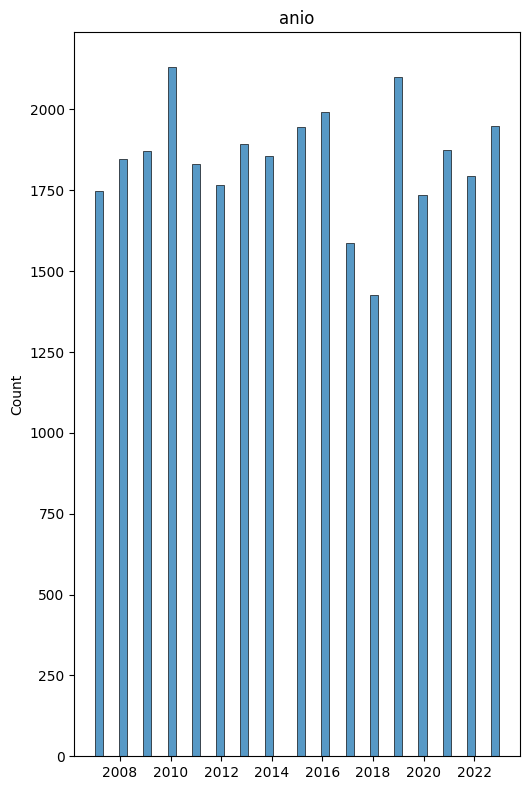

In [46]:
f.plot_numericas(df_num)

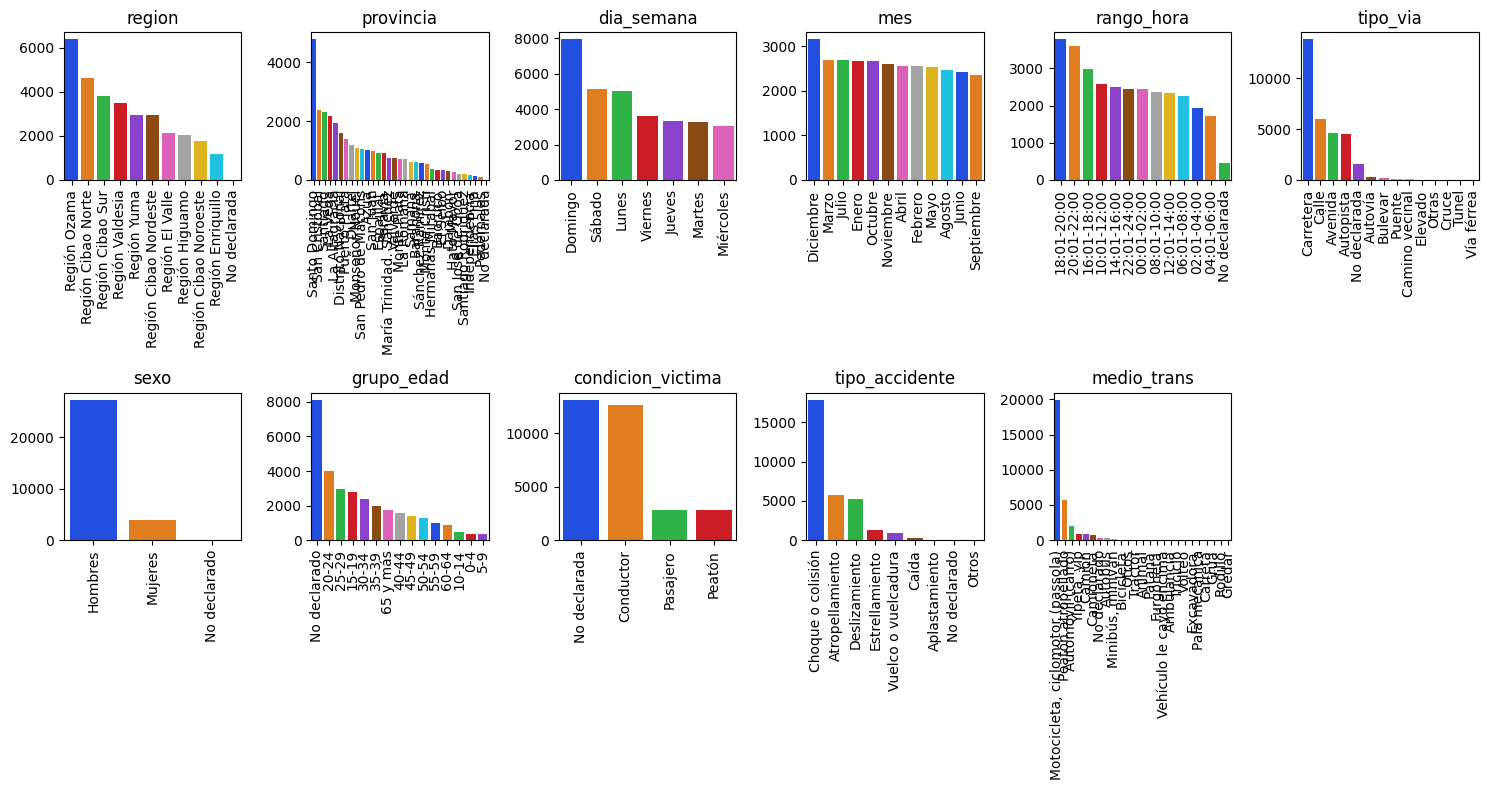

In [47]:
f.plot_categoricas(df_cat)

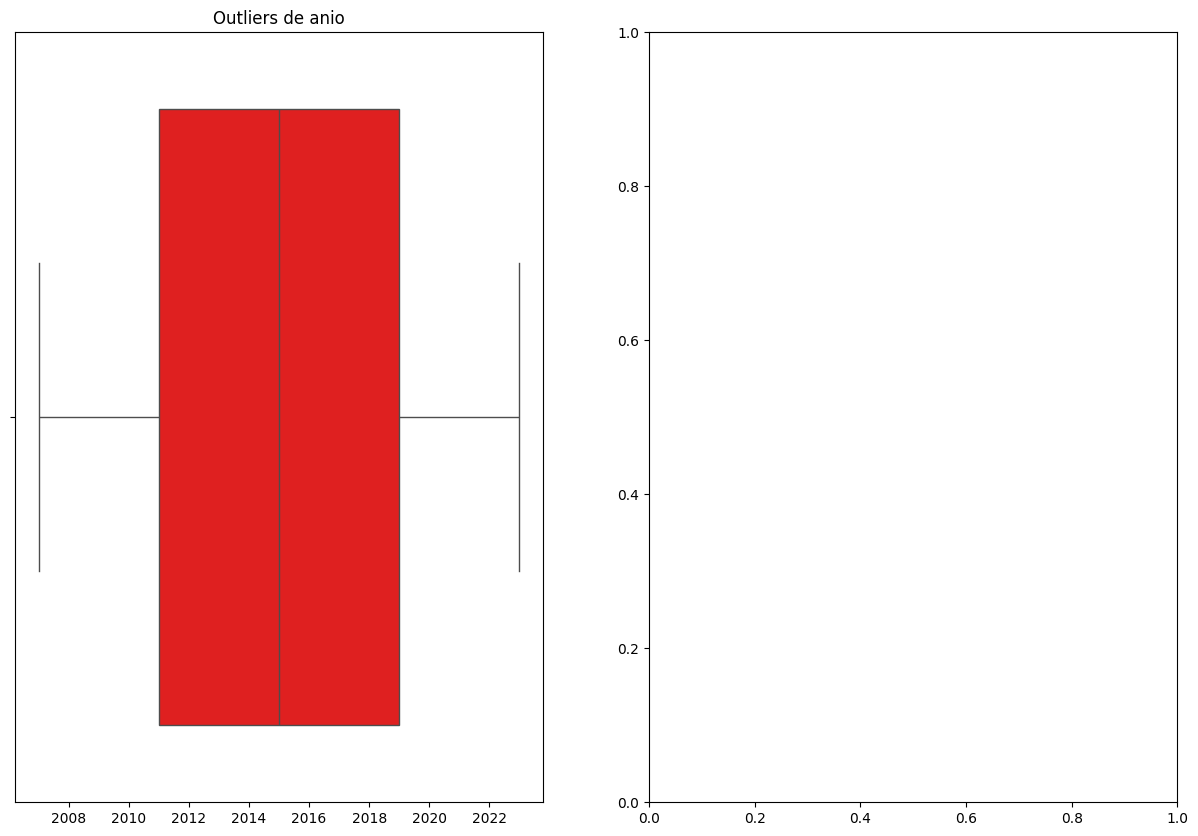

In [48]:
f.detectar_outliers(df_descodificada)

Solo tengo una variable numérica, los años. Esta no presenta ningún outlier. Se puede observar como se presenta un corte (50% de los casos) está justo en el 2015.

### Diferencias geográficas

In [49]:
df_descodificada.groupby(['region', 'provincia'])[['tipo_via']].count().sort_index()

tipo_via
region                provincia                        
No declarada          No declarada                    5
Región Cibao Nordeste Duarte                       1186
                      Hermanas Mirabal              388
                      María Trinidad. Sánchez       746
                      Samaná                        606
Región Cibao Noroeste Dajabón                       294
                      Monte Cristi                  535
                      Santiago Rodríguez            204
                      Valverde                      742
Región Cibao Norte    Espaillat                     926
                      Puerto Plata                 1393
                      Santiago                     2325
Región Cibao Sur      La Vega                      2168
                      Monseñor Nouel               1073
                      Sánchez Ramírez               585
Región El Valle       Azua                         1009
                      Elías Piña                    133
                      San Juan                      969
Región Enriquillo     Baoruco                       334
                      Barahona                      598
                      Independencia                 167
                      Pedernales                     92
Región Higuamo        Hato Mayor                    267
                      Monte Plata                   728
                      San Pedro de Macorís         1061
Región Ozama          Distrito Nacional            1601
                      Santo Domingo                4776
Región Valdesia       Peravia                       910
                      San Cristóbal                2373
                      San José de Ocoa              206
Región Yuma           El Seibo                      325
                      La Altagracia                1919
                      La Romana                     707

In [50]:
tabla_pivote_region = df_descodificada.pivot_table(
    index='region',        # regiones serán las filas
    columns='anio',         # años serán las columnas
    values='tipo_accidente',  
    aggfunc='count',       # cantidad de accidentes
)

tabla_pivote_region['Total'] = tabla_pivote_region.sum(axis=1)  
tabla_pivote_region = tabla_pivote_region.sort_values(by='Total', ascending=False)
tabla_pivote_region

anio,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
region,,,,,,,,,,,,,,,,,,
Región Ozama,446.00,495.00,455.00,496.00,418.00,419.00,426.00,355.00,299.00,322.00,271.00,280.00,392.00,321.00,308.00,326.00,348.00,6377.00
Región Cibao Norte,247.00,236.00,293.00,293.00,237.00,237.00,298.00,312.00,349.00,310.00,236.00,227.00,333.00,224.00,291.00,245.00,276.00,4644.00
Región Cibao Sur,179.00,210.00,233.00,276.00,224.00,202.00,214.00,222.00,253.00,255.00,218.00,161.00,281.00,217.00,239.00,214.00,228.00,3826.00
Región Valdesia,197.00,230.00,228.00,245.00,223.00,148.00,175.00,192.00,152.00,212.00,179.00,206.00,227.00,240.00,185.00,199.00,251.00,3489.00
Región Yuma,193.00,191.00,160.00,154.00,152.00,148.00,171.00,164.00,190.00,199.00,142.00,117.00,200.00,144.00,205.00,193.00,228.00,2951.00
Región Cibao Nordeste,136.00,135.00,134.00,190.00,168.00,185.00,187.00,189.00,218.00,233.00,188.00,116.00,189.00,166.00,154.00,175.00,163.00,2926.00
Región El Valle,79.00,87.00,124.00,153.00,130.00,117.00,111.00,118.00,137.00,125.00,129.00,133.00,151.00,114.00,134.00,140.00,129.00,2111.00
Región Higuamo,123.00,145.00,112.00,125.00,115.00,120.00,120.00,106.00,133.00,137.00,102.00,76.00,124.00,128.00,144.00,130.00,116.00,2056.00
Región Cibao Noroeste,77.00,62.00,75.00,102.00,96.00,111.00,121.00,118.00,132.00,126.00,70.00,76.00,123.00,116.00,140.00,108.00,122.00,1775.00


A lo largo del tiempo vemos que la Región Ozama se ha mantenido en el primer lugar con relación a las muertes por accidentes de tránsito, a excepción del 2015 cuando la Regio Cibao Norte (segundo lugar) le superó. Para Ozama, era normal presentar más de 400 fallecidos hasta el 2013, a partir de ahí el números de víctimas tuvo reducciones aunque a partir del 2018 empieza a oscilar nuevamente entre 300-400.

Entre Cibao Norte y Cibao Sur, los fallecidos en accidentes de tránsito se mantienen oscilando entre 200 y 300 casos por año. A excepción de casos particular para el Cibao Norte (2014-2015-2016-2019) donde supera las 300 defunciones.

En el caso de Valdesia, con frecuencia supera los 200 casos al año aunque tiene distintos años donde no supera esta franja. El valor más alto que presenta en defunciones resulta ser el año más reciente: 2023.

In [51]:
tabla_pivote_provincia = df_descodificada.pivot_table(
    index='provincia',        # provincias serán las filas
    columns='anio',         # años serán las columnas
    values='tipo_accidente',  # columna a contar
    aggfunc='count',       # cantidad de accidentes
)

tabla_pivote_provincia['Total'] = tabla_pivote_provincia.sum(axis=1)  
tabla_pivote_provincia = tabla_pivote_provincia.sort_values(by='Total', ascending=False)
tabla_pivote_provincia

anio,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
provincia,,,,,,,,,,,,,,,,,,
Santo Domingo,329.00,372.00,341.00,393.00,319.00,313.00,311.00,243.00,235.00,254.00,210.00,197.00,301.00,246.00,220.00,237.00,255.00,4776.00
San Cristóbal,148.00,174.00,177.00,178.00,160.00,100.00,124.00,132.00,98.00,121.00,115.00,145.00,147.00,166.00,109.00,116.00,163.00,2373.00
Santiago,117.00,108.00,153.00,165.00,101.00,137.00,135.00,146.00,164.00,147.00,118.00,154.00,164.00,121.00,155.00,120.00,120.00,2325.00
La Vega,71.00,85.00,148.00,166.00,136.00,115.00,119.00,135.00,146.00,153.00,122.00,97.00,167.00,127.00,126.00,123.00,132.00,2168.00
La Altagracia,131.00,131.00,94.00,103.00,105.00,103.00,96.00,110.00,125.00,127.00,84.00,84.00,140.00,86.00,126.00,123.00,151.00,1919.00
Distrito Nacional,117.00,123.00,114.00,103.00,99.00,106.00,115.00,112.00,64.00,68.00,61.00,83.00,91.00,75.00,88.00,89.00,93.00,1601.00
Puerto Plata,82.00,88.00,90.00,78.00,80.00,75.00,104.00,94.00,99.00,88.00,57.00,39.00,107.00,64.00,78.00,73.00,97.00,1393.00
Duarte,61.00,63.00,60.00,90.00,66.00,94.00,68.00,64.00,104.00,116.00,74.00,44.00,64.00,56.00,52.00,60.00,50.00,1186.00
Monseñor Nouel,89.00,83.00,52.00,61.00,56.00,56.00,40.00,59.00,69.00,54.00,69.00,53.00,73.00,57.00,75.00,62.00,65.00,1073.00


Se mantienen las misma provincias que tienen más accidentes, como las que tienen más muertes en base a estos: Santo Domingo, San Cristóbal, Santiago, La Vega y La Altagracia.

Destaca Santo Domingo porque duplica el caso de muertos, con relación a la provincia en segundo lugar, Santo Domingo (4776) a San Cristóbal (2373).

Santo Domingo, presentaba más de 300 fallecidos hasta el 2013 por esta razón. A partir del 2014 los fallecidos no superan los 260 casos (a excepción del 2019 con 301 fallecimientos). 

San Cristóbal tenía unos primeros números más altos (hasta 176 en 2010), a partir del 2011 los fallecidos están oscilando entre 100 y 160 anual. En los últimos 5 años solo resalta el 2020 con 163 defunciones.

### Diferencias por género

In [52]:
df_genero_medio = df_descodificada.groupby(['sexo', 'medio_trans'])[['tipo_via']].count().sort_values(by=['sexo', 'tipo_via'], ascending=[True, False])
df_genero_medio.rename(columns={'tipo_via': 'Conteo'}, inplace=True)
df_genero_medio['Total por Sexo'] = df_genero_medio.groupby(level=0)['Conteo'].transform('sum')
df_genero_medio['Porcentaje (%)'] = (df_genero_medio['Conteo'] / df_genero_medio['Total por Sexo']) * 100
df_genero_medio

Conteo  Total por Sexo  \
sexo         medio_trans                                                 
Hombres      Motocicleta, ciclomotor (passola)   18421           27389   
             Peatón atropellado                   4501           27389   
             Automóvil (carro)                    1590           27389   
             Camión                                763           27389   
             Yipeta, yip                           672           27389   
             Camioneta                             618           27389   
             No declarado                          299           27389   
             Autobús                               175           27389   
             Minibús, miniván                      147           27389   
             Bicicleta                              80           27389   
             Otros                                  49           27389   
             Tractor                                18           27389   
             Animal                                 11           27389   
             Patana                                 10           27389   
             Furgoneta                               6           27389   
             Vehículo le cayó encima                 6           27389   
             Ambulancia                              5           27389   
             Triciclo                                5           27389   
             Volteo                                  3           27389   
             Carreta                                 2           27389   
             Excavadora                              2           27389   
             Grúa                                    2           27389   
             Pala mecánica                           2           27389   
             Gredar                                  1           27389   
             Rodillo                                 1           27389   
Mujeres      Motocicleta, ciclomotor (passola)    1535            3891   
             Peatón atropellado                   1257            3891   
             Automóvil (carro)                     475            3891   
             Yipeta, yip                           257            3891   
             Camioneta                             103            3891   
             Autobús                                88            3891   
             Camión                                 61            3891   
             No declarado                           61            3891   
             Minibús, miniván                       46            3891   
             Otros                                   4            3891   
             Bicicleta                               2            3891   
             Excavadora                              1            3891   
             Tractor                                 1            3891   
No declarado Motocicleta, ciclomotor (passola)      25              71   
             Peatón atropellado                     17              71   
             Automóvil (carro)                      12              71   
             Camión                                  7              71   
             No declarado                            4              71   
             Camioneta                               2              71   
             Ambulancia                              1              71   
             Autobús                                 1              71   
             Minibús, miniván                        1              71   
             Yipeta, yip                             1              71   

                                                Porcentaje (%)  
sexo         medio_trans                                        
Hombres      Motocicleta, ciclomotor (passola)           67.26  
             Peatón atropellado                          16.43  
             Automóvil (carro)                            5.81  
             Camión   

- Observaciones:
    - Desde el 2007 hasta el 2023, han fallecido 27389 hombres en accidentes de tránsito a nivel nacional. En el caso del género femenino, en el mismo periodo de tiempo se han visto 3891 casos de fallecimientos en accidentes.
    - Los hombres tienden a perder la vida en accidentes en motocicleta (67.25%), o producto de un atropellamiento en la calle (16.43%), quedando en tercer lugar los accidentes en automóvil (5.80%)
    - Las mujeres por su parte pierden la vida en los mismos medios aunque debido a la diferencia de víctimas por género, estos números presentan diferenciar notables con los hombres: Motocicleta, 39.45%; Peatón atropellado 32.30% y Automóvil 12.20%.

In [53]:
df_genero_acc = df_descodificada.groupby(['sexo', 'tipo_accidente'])[['tipo_via']].count().sort_values(by=['sexo', 'tipo_via'], ascending=[True, False])
df_genero_acc.rename(columns={'tipo_via': 'Conteo'}, inplace=True)
df_genero_acc['Total por Sexo'] = df_genero_acc.groupby(level=0)['Conteo'].transform('sum')
df_genero_acc['Porcentaje %'] = df_genero_acc['Conteo'] / df_genero_acc['Total por Sexo'] * 100
df_genero_acc

Conteo  Total por Sexo  Porcentaje %
sexo         tipo_accidente                                           
Hombres      Choque o colisión     16175           27389         59.06
             Deslizamiento          4627           27389         16.89
             Atropellamiento        4502           27389         16.44
             Estrellamiento         1126           27389          4.11
             Vuelco o vuelcadura     692           27389          2.53
             Caída                   237           27389          0.87
             Aplastamiento            18           27389          0.07
             No declarado             11           27389          0.04
             Otros                     1           27389          0.00
Mujeres      Choque o colisión      1709            3891         43.92
             Atropellamiento        1260            3891         32.38
             Deslizamiento           575            3891         14.78
             Vuelco o vuelcadura     156            3891          4.01
             Estrellamiento          148            3891          3.80
             Caída                    40            3891          1.03
             Otros                     2            3891          0.05
             No declarado              1            3891          0.03
No declarado Choque o colisión        31              71         43.66
             Atropellamiento          17              71         23.94
             Deslizamiento            14              71         19.72
             Estrellamiento            8              71         11.27
             Vuelco o vuelcadura       1              71          1.41

En la mayorñia de casos, los hombres pierden su vida fruto de una colisión (59.05%) seguido de casos de deslizamiento y atropellamiento (ambos en un 16% con una muy pequeña diferencia).

Las mujeres también fallecen con mayor probabilidad en choques (43.92%), seguido de atropellamientos (32.38%) y deslizamientos (14.77%).

In [54]:
df_genero_edad = df_descodificada.groupby(['sexo', 'grupo_edad'])[['tipo_via']].count().sort_values(by=['sexo', 'tipo_via'], ascending=[True, False])
df_genero_edad.rename(columns={'tipo_via': 'Conteo'}, inplace=True)
df_genero_edad['Total por Sexo'] = df_genero_edad.groupby(level=0)['Conteo'].transform('sum')
df_genero_edad['Porcentaje (%)'] = (df_genero_edad['Conteo'] / df_genero_edad['Total por Sexo']) * 100
df_genero_edad

Conteo  Total por Sexo  Porcentaje (%)
sexo         grupo_edad                                          
Hombres      No declarado    7103           27389           25.93
             20-24           3616           27389           13.20
             25-29           2684           27389            9.80
             15-19           2456           27389            8.97
             30-34           2093           27389            7.64
             35-39           1787           27389            6.52
             65 y más        1458           27389            5.32
             40-44           1414           27389            5.16
             45-49           1206           27389            4.40
             50-54           1144           27389            4.18
             55-59            876           27389            3.20
             60-64            739           27389            2.70
             10-14            349           27389            1.27
             0-4              240           27389            0.88
             5-9              224           27389            0.82
Mujeres      No declarado     963            3891           24.75
             20-24            401            3891           10.31
             15-19            343            3891            8.82
             65 y más         297            3891            7.63
             25-29            290            3891            7.45
             30-34            271            3891            6.96
             35-39            209            3891            5.37
             40-44            185            3891            4.75
             45-49            166            3891            4.27
             50-54            147            3891            3.78
             5-9              133            3891            3.42
             0-4              128            3891            3.29
             60-64            123            3891            3.16
             55-59            119            3891            3.06
             10-14            116            3891            2.98
No declarado No declarado      68              71           95.77
             15-19              1              71            1.41
             30-34              1              71            1.41
             65 y más           1              71            1.41

Observaciones:
    - Tanto para hombres y mujeres, en la categoría de No declarada es que se presentan más casos. Estos se colocan entre un 26% para los hombres y un 25 % para las mujeres. Sin embargo, los siguientes se distribuyen así:
        - Para los hombres, de 20-24 años en el grupo mayoritario, con un 13.20%. Luego sigue el grupo de 25-29 con un 9.79%, y con apenas un pequeño porcentaje inferior está el grupo más preocupante con 15-19 años (8.96%). Luego los porcentajes van disminuyen pero los grupos que permanecen en los primeros puestos son los más jóvenes, que luego se van convirtiendo en grupos mayores y por último los más pequeños. De manera que, el conjunto de 15-29 es el que presenta más casos de fallecimientos. Esto tiene sentido si consideramos que gran parte de la juventud que quiere comenzar una movilización privada y no tiene los recursos/medios para un automóvil recurre a las motos. De esta forma pueden incurrir en trabajos como moto-taxi, mensajería, e incluso pueden utilizarlo para delinquir.
        - Para las mujeres, los grupos que más resaltan son 20-24 con un 10.30% seguido de 15-19 con un 8.81%. Sorpresivamente, el siguiente grupo que más casos presenta (7.63%) son las mujeres de 65 años y más.

In [55]:
df_descodificada.groupby(['grupo_edad', 'medio_trans'])[['tipo_via']].count().sort_values(by='tipo_via', ascending=False).head(10)

,,tipo_via
grupo_edad,medio_trans,
No declarado,"Motocicleta, ciclomotor (passola)",4976
20-24,"Motocicleta, ciclomotor (passola)",3214
15-19,"Motocicleta, ciclomotor (passola)",2279
25-29,"Motocicleta, ciclomotor (passola)",2203
30-34,"Motocicleta, ciclomotor (passola)",1661
No declarado,Peatón atropellado,1399
35-39,"Motocicleta, ciclomotor (passola)",1352
65 y más,Peatón atropellado,1042
40-44,"Motocicleta, ciclomotor (passola)",1010


Las edades donde más fallecidos encontramos va siguiendo la línea de los hombres. Las motocicletas predominan por encima de los demás medios, con el rango de edad predominante 'No declarado', seguido de 20-24 años y 15-19.

In [56]:
df_descodificada.groupby(['grupo_edad', 'tipo_accidente'])[['tipo_via']].count().sort_values(by='tipo_via', ascending=False).head(10)

tipo_via
grupo_edad   tipo_accidente             
No declarado Choque o colisión      4847
20-24        Choque o colisión      2514
15-19        Choque o colisión      1857
25-29        Choque o colisión      1820
30-34        Choque o colisión      1442
No declarado Atropellamiento        1398
             Deslizamiento          1363
35-39        Choque o colisión      1201
65 y más     Atropellamiento        1042
40-44        Choque o colisión       951

In [57]:
df_descodificada.groupby('anio')['tipo_via'].count()

anio
2007    1747
2008    1846
2009    1873
2010    2132
2011    1833
2012    1768
2013    1892
2014    1855
2015    1946
2016    1991
2017    1587
2018    1427
2019    2100
2020    1737
2021    1874
2022    1794
2023    1949
Name: tipo_via, dtype: int64

In [58]:
df_descodificada['medio_trans'].value_counts()

medio_trans
Motocicleta, ciclomotor (passola)    19981
Peatón atropellado                    5775
Automóvil (carro)                     2077
Yipeta, yip                            930
Camión                                 831
Camioneta                              723
No declarado                           364
Autobús                                264
Minibús, miniván                       194
Bicicleta                               82
Otros                                   53
Tractor                                 19
Animal                                  11
Patana                                  10
Furgoneta                                6
Vehículo le cayó encima                  6
Ambulancia                               6
Triciclo                                 5
Volteo                                   3
Excavadora                               3
Pala mecánica                            2
Carreta                                  2
Grúa                                     2